<h3>Softmax</h3>

In [117]:
import numpy as np

z = np.array([5, 2, 4, 3])

def test_softmax(z):
    return np.exp(z)/np.sum(np.exp(z), axis=0)
test_softmax(z)

array([0.64391426, 0.0320586 , 0.23688282, 0.08714432])

In [118]:
from tensorflow.keras.losses import CategoricalCrossentropy

y_hat = [[0.6, 0.3, 0.05, 0.05], [0.3, 0.1, 0.5, 0.1]]
y_true = [[1, 0, 0, 0], [0, 1, 0, 0]]

loss = CategoricalCrossentropy()
loss(y_true, y_hat)


<tf.Tensor: shape=(), dtype=float32, numpy=1.4067054>

In [119]:
-1/2*(np.log(0.6) + np.log(0.1))

1.4067053583800182

<h3>Exercise</h3>

<h4>Import libraries</h4>

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt   

<h4>Load data</h4>
<p>To create training and testing set we can use sklearn train_test_split feature.</p>

In [121]:
# Read data from CSV file into data_frame 
data_frame = pd.read_csv('./dataset/iris_full.csv')
data_frame

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [122]:
# Split feature set and target set
feature_set = data_frame.iloc[:, :-1] # get all columns except the last column
target_set = data_frame.iloc[:, -1] # get the last column

# Divide dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_set, test_size=0.2, random_state=42)

# Print the size of the split dataset
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
y_train.shape: (120,)
y_test.shape: (30,)


In [123]:
m = X_train.shape[0]
print(m)

120


<p>As we are using linearity, For vector multiplication adding a column in X with all the value 1</p>

In [124]:
X = np.hstack((np.ones((m,1)),X_train))     

<p>As we have 3 classes for easier computation we will convert out output vector in matrix where no of columns is equal to the no of classes. The values in the matrix will be 0 or 1. For instance the rows where we have output 2 the column 2 will contain 1 and rest all 0</p>

In [125]:
print(set(target_set))

{0.0, 1.0, 2.0}


In [126]:
k = np.unique(target_set)
k.sort()

label_mapping = {label: i for i, label in enumerate(k)}
Y = np.zeros((m, len(k)))

for cls in target_set:
    cls_int = label_mapping[cls]
    Y[np.where(y_train[:] == cls), cls_int] = 1

<h4>Softmax Function</h4>

In [127]:
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z), axis=1).reshape(z.shape[0], 1)

<h4>Softmax Regression Implementation</h4>

In [128]:
#define theta with size 3,5 as there are 3 classes and 5 features, lets take the initial value as 0
theta = np.zeros((3,5))

#learning rate
learning_rate = 0.001

#to store cost values
cost_hist = []

#no of iterations we want our model to be trained
no_of_iterations = 50000

#counter
i = 0

for i in range(no_of_iterations):

    #model/hypothesis function
    lineq = np.dot(X, theta.T)
    h = softmax(lineq)

    #Cost function 
    cost = -np.sum(Y * np.log(h)) / m
    cost_hist.append(cost)
    
    #using gradient calculate new theta
    delta = (learning_rate/m) * np.dot((h-Y).T, X)
    theta = theta - delta
    
    i = i + 1

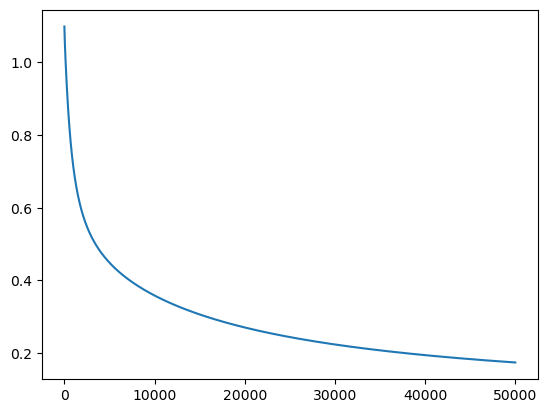

In [129]:
plt.plot(cost_hist)
plt.show()

<h4>Prediction on test data</h4>

In [130]:
#no of test samples
m_test = X_test.shape[0]

#As we are using vector implementation adding a column in test_X with all the value 1
X_test = np.hstack((np.ones((m_test,1)),X_test))

probab = softmax(np.dot(X_test,theta.T))
predict = np.argmax(probab, axis=1)

<h4>Comparing our model with scikit library</h4>

<p>Lets compare our model with the scikit logistic model. we have used mean square error, variance values and accuracy score for model comparison.</p>

In [131]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, accuracy_score

#train the model with training data
regr = linear_model.LogisticRegression()
regr.fit(X,y_train)
#Predict our test data
sklearn_predict = regr.predict(X_test)

print('Sklearn')
#coefficients
print('Coefficients: {}'.format(regr.coef_))
# Accuracy score
print("Accuracy score: %.2f" % accuracy_score(sklearn_predict, y_test))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(sklearn_predict, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y_test, sklearn_predict))

print('\n')

print('Our Model')
#coefficients
print('Coefficients: {}'.format(theta))
# Accuracy score
print("Accuracy score: %.2f" % accuracy_score(predict, y_test))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(predict, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y_test, predict))

Sklearn
Coefficients: [[-2.38005529e-03 -4.02419296e-01  9.54493111e-01 -2.37483237e+00
  -1.01014166e+00]
 [ 7.63122897e-04  5.14475748e-01 -2.47534327e-01 -2.15489816e-01
  -7.59879355e-01]
 [ 1.61693239e-03 -1.12056452e-01 -7.06958784e-01  2.59032218e+00
   1.77002102e+00]]
Accuracy score: 1.00
Mean squared error: 0.00
Variance score: 1.00


Our Model
Coefficients: [[ 0.32797702  0.66417639  1.6340056  -2.23239798 -1.02376381]
 [ 0.37564778  0.55803221 -0.22117721 -0.07711884 -0.68150347]
 [-0.7036248  -1.2222086  -1.4128284   2.30951681  1.70526728]]
Accuracy score: 1.00
Mean squared error: 0.00
Variance score: 1.00


c:\Users\dongu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
